In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Residential

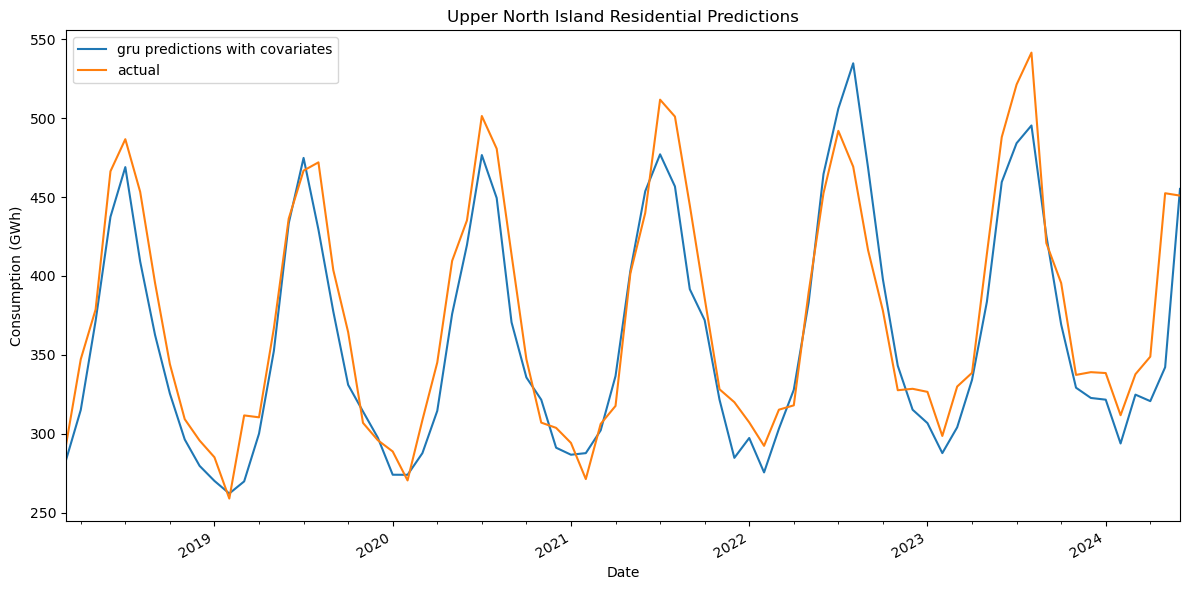

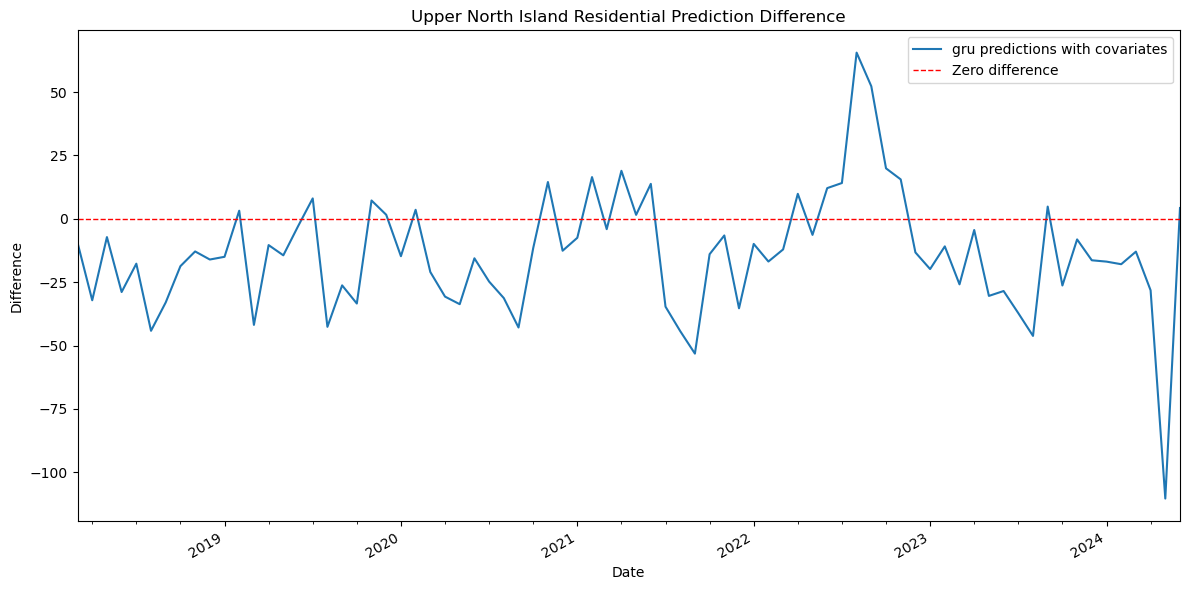

In [11]:
zones = ['UNI', 'CNI', 'LNI', 'USI', 'LSI']

gru_uni = pd.read_csv('res/uni/GRU_covariates,UNI,res.csv', parse_dates=[0], index_col=0)

# plot of prediction vs actual
plt.figure(figsize=(12, 6))
gru_uni['predictions'].plot(label='gru predictions with covariates')
gru_uni['Est. Total consumption (GWh)'].plot(label='actual')
plt.title('Upper North Island Residential Predictions')
plt.xlabel('Date')
plt.ylabel('Consumption (GWh)')
plt.legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# plot of difference
plt.figure(figsize=(12, 6))
gru_uni['difference'].plot(label='gru predictions with covariates')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1, label='Zero difference')
plt.title('Upper North Island Residential Prediction Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

## Business

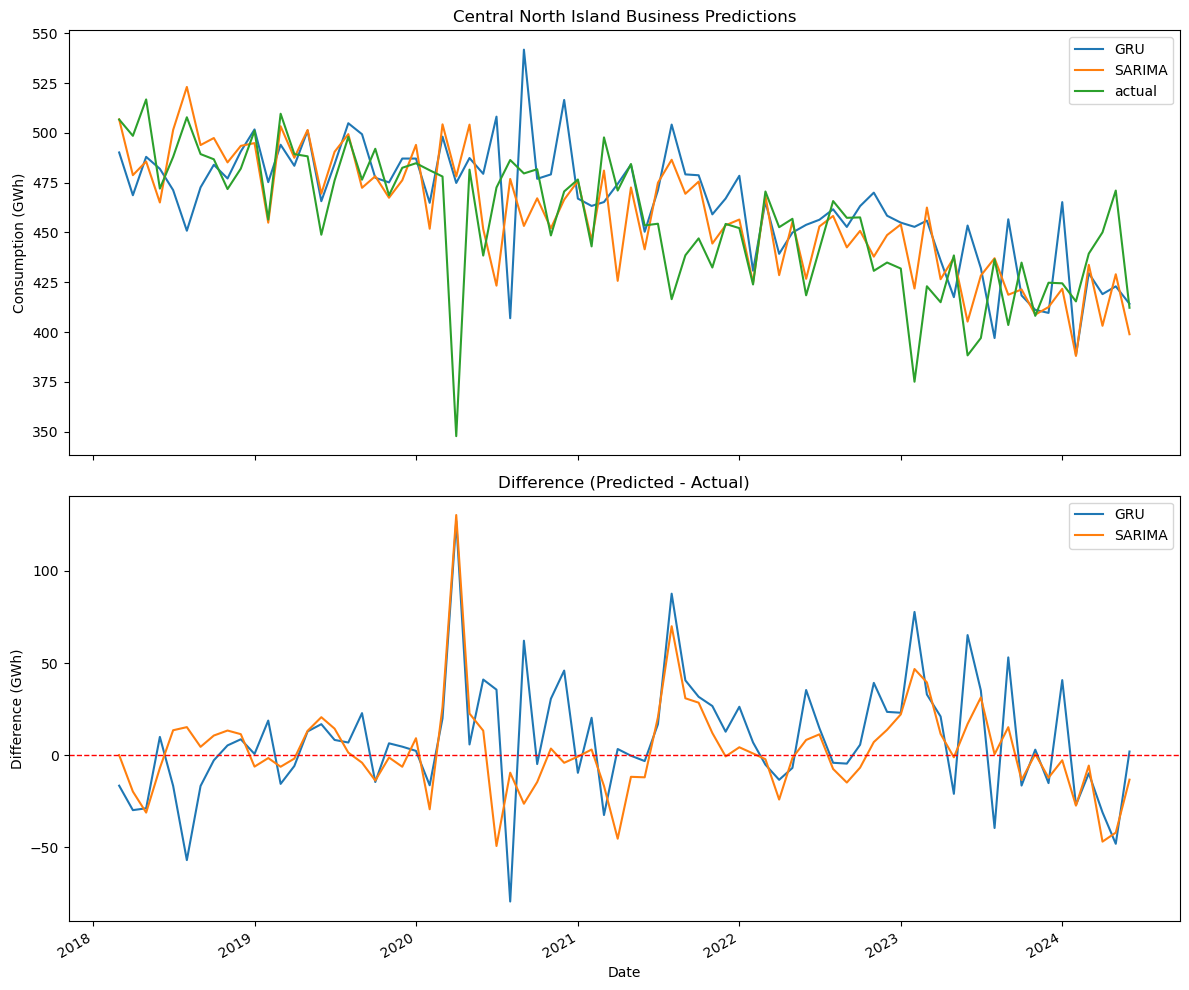

In [21]:
directory = 'bus/cni'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    model_params = csv_file.split(',')[0]
    df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
    ax1.plot(df.index, df['predictions'], label=model_params)
    ax2.plot(df.index, df['difference'], label=model_params)
    if csv_file == csv_files[-1]:
        ax1.plot(df.index, df['actual'], label='actual')

ax1.set_title('Central North Island Business Predictions')
ax1.set_ylabel('Consumption (GWh)')
ax1.legend()

ax2.set_title('Difference (Predicted - Actual)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Difference (GWh)')
ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
ax2.legend()

fig.autofmt_xdate()

# Use tight layout to prevent the labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()